In [37]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

In [38]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import KFold
from math import sqrt  # for root mean-squared error calculation

In [39]:
#set working directory

os.chdir('C:\\Users\R\Desktop\\MSDS 422\\Boston Housing Study\\jump-start-boston-housing-v001\\jump-start-boston-housing-v001')


# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

In [40]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [41]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB
None


In [42]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [43]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [44]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [45]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [46]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [47]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


In [58]:
#create Pandas data frame of model data
boston_input = pd.DataFrame(data=model_data)

#create column names
boston_input.columns = ['Median_value','Crime_Rate','Land_Zoned', 'Industrial', 'Charles_River','Pollution', 'Avg_Rooms', 'Pre1940', 'Distance_center', 'Highway_access', 'Avg_tax', 'Teacher_ratio','Low_income']

#examine first five values of data frame
boston_input.head()

,Median_value,Crime_Rate,Land_Zoned,Industrial,Charles_River,Pollution,Avg_Rooms,Pre1940,Distance_center,Highway_access,Avg_tax,Teacher_ratio,Low_income
0,0.160376,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.101258,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,1.326830,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,1.185112,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,1.490352,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [75]:
prices.shape

(506,)

In [76]:
features.shape

(506, 12)

In [132]:
#save data information to txt file
def data_info_save_to_file(data, dataname):
    print('\n---------{} Data Info----------\n'.format(dataname))
    print('\n{} Data shape: {}'.format(dataname, data.shape))
    print('\n{} Data types: {}'.format(dataname, data.dtypes))
    print('\n{} Data column values: {}'.format(dataname, data.columns.values)) 
    print('\n{} Data head: {}'.format(dataname, data.head())) 
    print('\n{} Data tail: {}'.format(dataname, data.tail()))
    print('\n{} Data descriptive statistics: {}'.format(dataname, data.describe()))
    print('\n{} Data correlations: {}'.format(dataname, data.corr(method='pearson')))
    with open("{}_Data_Info.txt".format(dataname), "w") as text_file:
        text_file.write('\n---------{} Data Info----------\n'.format(dataname)+
                        '\n{} Data shape: {}'.format(dataname, str(data.shape)) +
                        '\n{} Data types: {}'.format(dataname, str(data.dtypes)) +
                        '\n{} Data column values: {}'.format(dataname, str(data.columns.values)) + 
                        '\n{} Data head: {}'.format(dataname, str(data.head()))+ 
                        '\n{} Data tail: {}'.format(dataname, str(data.tail()))+
                        '\n{} Data descriptive statistics: {}'.format(dataname, str(data.describe()))+ 
                        '\n{} Data Info: {}'.format(dataname, str(data.info()))+
                        '\n{} Data correlations: {}'.format(dataname, str(boston_input.corr(method='pearson'))))

In [133]:
#examine data information txt file
data_info_save_to_file(boston_input, 'boston_input')


---------boston_input Data Info----------


boston_input Data shape: (506, 13)

boston_input Data types: Median_value       float64
Crime_Rate         float64
Land_Zoned         float64
Industrial         float64
Charles_River      float64
Pollution          float64
Avg_Rooms          float64
Pre1940            float64
Distance_center    float64
Highway_access     float64
Avg_tax            float64
Teacher_ratio      float64
Low_income         float64
dtype: object

boston_input Data column values: ['Median_value' 'Crime_Rate' 'Land_Zoned' 'Industrial' 'Charles_River'
 'Pollution' 'Avg_Rooms' 'Pre1940' 'Distance_center' 'Highway_access'
 'Avg_tax' 'Teacher_ratio' 'Low_income']

boston_input Data head:    Median_value  Crime_Rate  Land_Zoned  Industrial  Charles_River  Pollution  \
0      0.160376   -0.419782    0.284830   -1.287909      -0.272599  -0.144217   
1     -0.101258   -0.417339   -0.487722   -0.593381      -0.272599  -0.740262   
2      1.326830   -0.417342   -0.487722   -0.

C:\Users\R\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


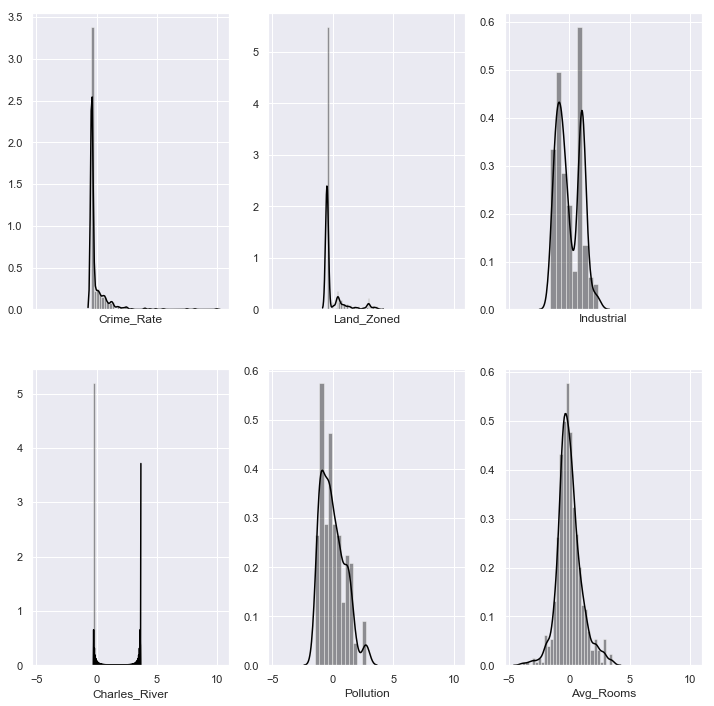

In [143]:
#plot histogram/density plots for data frame
f, axes = plt.subplots(2, 3, figsize=(12, 12), sharex=True)
sns.set_style('darkgrid')
sns.distplot(boston_input['Crime_Rate'], color= 'black', ax=axes[0,0])
sns.distplot(boston_input['Land_Zoned'], color = 'black', ax=axes[0,1])
sns.distplot(boston_input['Industrial'], color = 'black', ax=axes[0,2])
sns.distplot(boston_input['Charles_River'], color = 'black', ax=axes[1,0])
sns.distplot(boston_input['Pollution'], color = 'black', ax=axes[1,1])
sns.distplot(boston_input['Avg_Rooms'], color = 'black', ax=axes[1,2])



C:\Users\R\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


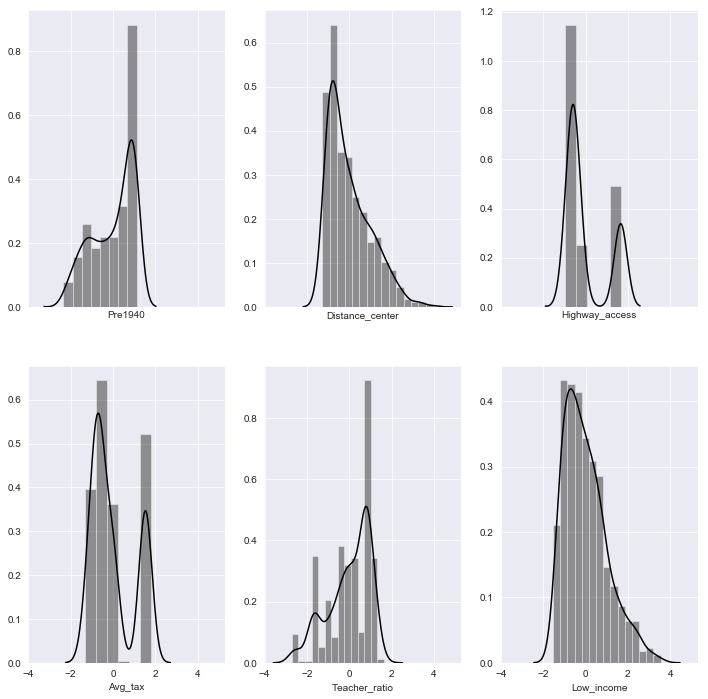

In [64]:
#plot histogram/density plots for data frame
f, axes = plt.subplots(2, 3, figsize=(12, 12), sharex=True)
sns.set_style('darkgrid')
sns.distplot(boston_input['Pre1940'], color= 'black', ax=axes[0,0])
sns.distplot(boston_input['Distance_center'], color = 'black', ax=axes[0,1])
sns.distplot(boston_input['Highway_access'], color = 'black', ax=axes[0,2])
sns.distplot(boston_input['Avg_tax'], color = 'black', ax=axes[1,0])
sns.distplot(boston_input['Teacher_ratio'], color = 'black', ax=axes[1,1])
sns.distplot(boston_input['Low_income'], color = 'black', ax=axes[1,2])

C:\Users\R\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


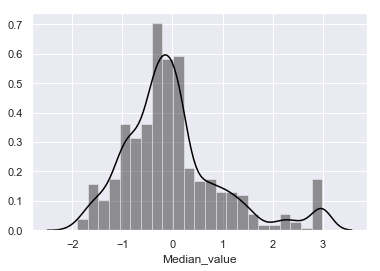

In [137]:
#plot histogram/density plot of response variable (Mean_value)
Density_plot_median_value = sns.distplot(boston_input['Median_value'] , color="black")
fig = Density_plot_median_value.get_figure()
fig.savefig("Median Value Density Plot.png", bbox_inches='tight')


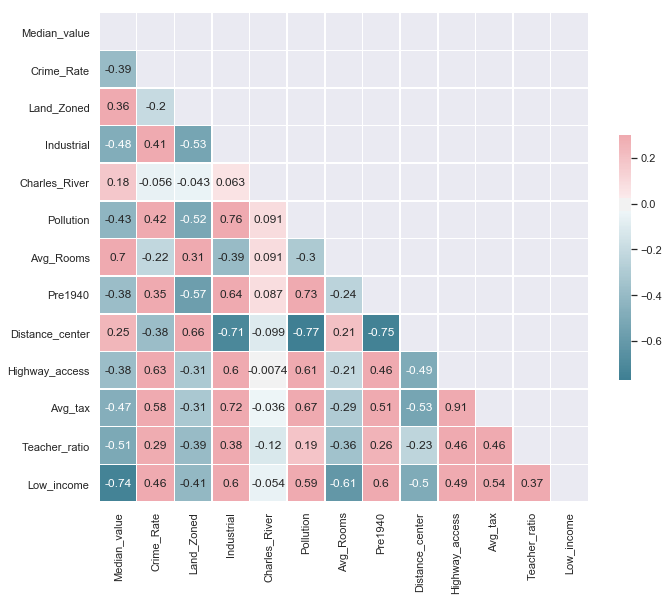

In [139]:
# Compute the correlation matrix
corr = boston_input.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

#save png file of heatmap
fig = heatmap.get_figure()
fig.savefig("Correlation Heatmap.png")



In [180]:
#begin to examine effect of explanatory variables on response variable
sns.set()
sns.relplot(x='Median_value', y='Low_income',
            data=boston_input)

sns.relplot(x='Median_value', y='Crime_Rate',
            data=boston_input)

sns.relplot(x='Median_value', y='Land_Zoned',
            data=boston_input)

sns.relplot(x='Median_value', y='Industrial',
            data=boston_input)

sns.relplot(x='Median_value', y='Charles_River',
            data=boston_input)

sns.relplot(x='Median_value', y='Pollution',
            data=boston_input)

sns.relplot(x='Median_value', y='Avg_Rooms',
            data=boston_input)

sns.relplot(x='Median_value', y='Pre1940',
            data=boston_input)

sns.relplot(x='Median_value', y='Distance_center',
            data=boston_input)

sns.relplot(x='Median_value', y='Highway_access',
            data=boston_input)

sns.relplot(x='Median_value', y='Avg_tax',
            data=boston_input)

sns.relplot(x='Median_value', y='Teacher_ratio',
            data=boston_input)



SyntaxError: invalid syntax (<ipython-input-180-540d4d369663>, line 3)

In [171]:
#identify regression models to be evaluated
names = ['Linear_Regression','Lasso_Regression', 'ElasticNet_Regression', 'Ridge_Regression'] 

#specify paramaters to be used on models
regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED), 
               Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),                                         
               ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED)]

In [172]:
#use 10 fold cross validation
N_FOLDS = 10

In [173]:
# create numpy array to store results
cv_results = np.zeros((N_FOLDS, len(names)))

In [174]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

In [175]:
# set index for fold to 0
index_for_fold = 0  

for train_index, test_index in kf.split(model_data):
    print('\nFold Index:', index_for_fold,
          '------------------------------------------')
#create variables to train and test data
#response variable (mv) is first column so X_train and X_test will be 1:
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

   #train data on models
    index_for_method = 0 
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # Evaluate on test sets
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result,
              '\n--------------------------------------------------------\n')
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    
    index_for_fold += 1   


Fold Index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Fitted regression intercept: -0.005032049293645764
Fitted regression coefficients: [-0.11088775  0.13573238  0.01408652  0.0787664  -0.23758124  0.26794267
  0.0065031  -0.37082275  0.27035218 -0.23150162 -0.21456859 -0.45500336]
Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Root mean-squared error: 0.3080338355432656 
--------------------------------------------------------


Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cho

In [176]:
#convert numpy array of results into dataframe
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

#save results of cross-validation to txt file
with open("CV Results.txt", "w") as text_file:
    text_file.write('\nCross-validation results:\n'+
                    str(cv_results_df)+
                    '\nCross validation results column names:\n'+
                    str(names))

In [177]:
#save average results of cross-validation to txt file
pd.set_option('precision', 5)
print('\n----------------------------------------------')
print('Average results from 10-fold cross-validation\n',
      '\nModel            Root mean-squared error (RMSE)', sep = '') 
print(cv_results_df.mean())   
with open("CV Average Results.txt", "w") as text_file:
    text_file.write('\nAverage results from 10-fold cross-validation\n'+
                    '\nModel            Root mean-squared error (RMSE)'+ 
                     str(cv_results_df.mean()))



----------------------------------------------
Average results from 10-fold cross-validation

Model            Root mean-squared error (RMSE)
Linear_Regression        0.56194
Lasso_Regression         0.56051
ElasticNet_Regression    0.58738
Ridge_Regression         0.56808
dtype: float64
